### DATA620 - Assignment Week 1
#### Michael Ippolito
6/4/2022

In [116]:
# Load libraries
import networkx as net
import requests
import os.path
import matplotlib.pyplot as plt


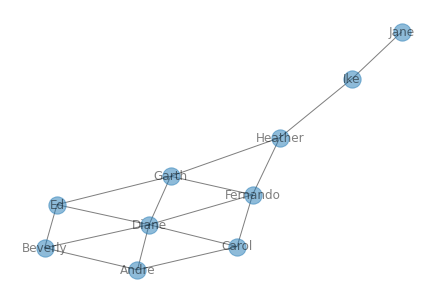

In [118]:
# Create blank graph
g = net.Graph()

# Add edges
g.add_edge('Andre', 'Beverly')
g.add_edge('Andre', 'Carol')
g.add_edge('Andre', 'Diane')
g.add_edge('Beverly', 'Diane')
g.add_edge('Beverly', 'Ed')
g.add_edge('Carol', 'Diane')
g.add_edge('Carol', 'Fernando')
g.add_edge('Diane', 'Fernando')
g.add_edge('Diane', 'Garth')
g.add_edge('Diane', 'Ed')
g.add_edge('Ed', 'Garth')
g.add_edge('Fernando', 'Garth')
g.add_edge('Fernando', 'Heather')
g.add_edge('Garth', 'Heather')
g.add_edge('Heather', 'Ike')
g.add_edge('Ike', 'Jane')

# Draw the graph
net.draw(g, with_labels=True, alpha=0.5)

In [106]:
# Create more complex graph using Paris metro station data

# Read data; data was taken from https://github.com/BTajini/Paris-Metro-Project
if os.path.exists('metro_paris.txt'):
    print('reading data from disk')
    fh = open('metro_paris.txt', 'r', encoding='utf-8')
    r = fh.read()
    fh.close()
else:
    url = 'https://raw.githubusercontent.com/BTajini/Paris-Metro-Project/master/Data/metro_paris.txt'
    print('fetching data from ' + url)
    r = requests.get(url)
    r = r.text
    fh = open('metro_paris.txt', 'w', encoding='utf-8')
    fh.write(r)
    fh.close()

# Split into nodes and edges
data = r.split('[Edges]\n')
nodes = dict([l.split(' ', maxsplit=1) for l in data[0].split('\n')[1:-1]])    # don't use first line "[Vertices]" or last (blank) line
edges = [l.split(' ') for l in data[1].split('\n')]
for e in edges:
    e[0] = e[0].rjust(4, '0')
    e[1] = e[1].rjust(4, '0')
print('Data includes', len(nodes), 'nodes and', len(edges), 'edges')

# Print first six samples of each
print("Data sample:")
print("\tnodes:",[nodes[k] for k in nodes.keys()][:6])
print("\tedges:",edges[:6])


reading data from disk
Data includes 376 nodes and 933 edges
Data sample:
	nodes: ['Abbesses', 'Alexandre Dumas', 'Alma Marceau', 'Alésia', 'Anatole France', 'Anvers']
	edges: [['0000', '0238', '41'], ['0000', '0159', '46'], ['0001', '0012', '36'], ['0001', '0235', '44'], ['0002', '0110', '69'], ['0002', '0139', '50']]


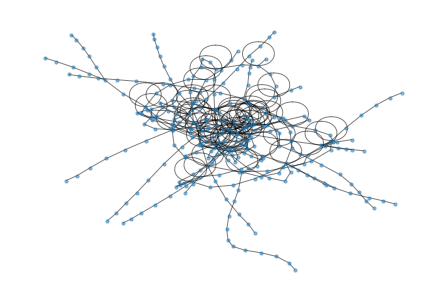

In [117]:
# Create new graph
g2 = net.Graph()

# Add edges
for e in edges:
    g2.add_edge(nodes[e[0]], nodes[e[1]], weight=e[2])

# Draw the graph
net.draw(g2, with_labels=False, node_size=10, font_size=8, alpha=0.5, width=1)
